Introduction:

YouTube is the most popular video platfrom in the world. YouTube has a lot of trending videos that are updated regulary. I will use Python with some packages to analyze the Trending YouTube Video Statistics dataset which includes data for many countries however US and Canada their trending videos will be studied here. The dataset was collected in 2017 and 2018. I will analyze this data to get and understanding of YouTube trending videos and be able to compare different aspects of them. 

In [1]:
# Import packages and liberaries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns    # seaborn package is a statistical visualization for high leval interface.
import scipy
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import re                           # re package: regular expression for maching or finding string.
import json                         # json package use for transmit data from web app
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Loading date (usa, canada and their category IDs):
# Using r before path because I use windows and I didnt want backslash treat like scape character.
# when read csv file panda convert to df.
canada = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Data Science Projects\PythonThinkful\youtube-new\CAvideos.csv') 
usa = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Data Science Projects\PythonThinkful\youtube-new\USvideos.csv')
canada_categoryid= pd.read_json(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Data Science Projects\PythonThinkful\youtube-new\CA_category_id.json')
usa_categoryid= pd.read_json(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Data Science Projects\PythonThinkful\youtube-new\US_category_id.json')
combined= pd.concat([canada,usa])
df = pd.DataFrame(combined)
combined_category= pd.concat([canada_categoryid, usa_categoryid])

In [3]:
# combined_category how is look like:
combined_category.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [4]:
# What is it inside combined_category['items']:
list(combined_category['items'][0])

[{'kind': 'youtube#videoCategory',
  'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}}]

In [5]:
# By creating a loop, category ID with category name are mapped on a column:
# Since category is a dict,it's assigning value with each of the id as key categories[category["id"]] means categories[key] 
# Where key  =  category["id"] value is category["snippet"]["title"] so you are doing category[key]=value 
categories={}
for item in combined_category["items"]:
    categories[item["id"]]=item["snippet"]["title"]
    print(categories[item["id"]])
    #print(item["snippet"]["title"])
id=["category_id"]
df['category_id']=df['category_id'].astype(str)
df["category_name"]= df["category_id"].map(categories)

Film & Animation
Autos & Vehicles
Music
Pets & Animals
Sports
Short Movies
Travel & Events
Gaming
Videoblogging
People & Blogs
Comedy
Entertainment
News & Politics
Howto & Style
Education
Science & Technology
Movies
Anime/Animation
Action/Adventure
Classics
Comedy
Documentary
Drama
Family
Foreign
Horror
Sci-Fi/Fantasy
Thriller
Shorts
Shows
Trailers
Film & Animation
Autos & Vehicles
Music
Pets & Animals
Sports
Short Movies
Travel & Events
Gaming
Videoblogging
People & Blogs
Comedy
Entertainment
News & Politics
Howto & Style
Education
Science & Technology
Nonprofits & Activism
Movies
Anime/Animation
Action/Adventure
Classics
Comedy
Documentary
Drama
Family
Foreign
Horror
Sci-Fi/Fantasy
Thriller
Shorts
Shows
Trailers


In [6]:
# Get some information about data such as length and Count non-NA cells for each column:
#length gives length of string or number of rows.
len(df)
# Shape attribute of numpy shows number of rows and columns (nr,nc).
print(df.shape)
# nunique gives number of unique value in each column also dont count nan value.
print(df.nunique())
df.drop_duplicates(inplace=True) # drops all duplicates from all cols
#df = df.drop_duplicates(subset=['App'], keep = 'first') # only drops the duplicated records from app col

(81830, 18)
c                             2
video_id                  28145
trending_date               205
title                     28748
channel_title              6251
category_id                  17
publish_time              27440
tags                      24038
views                     75352
likes                     42785
dislikes                  10008
comment_count             16760
thumbnail_link            28507
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               26895
category_name                17
dtype: int64


In [7]:
# Clean dataset by removing duplicates:
df.drop_duplicates(inplace=True)

In [8]:
# Get more information after cleaning data:
print(df.shape)
len(df)

(81782, 18)


81782

After removing duplicates, the dataset will have 81782 entries stored in 17 columns

In [9]:
# See dataset looklikes:
df.head(2)

,c,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,ca,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,ca,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy


In [10]:
# Exploring Nulls and type of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81782 entries, 0 to 40948
Data columns (total 18 columns):
c                         81782 non-null object
video_id                  81782 non-null object
trending_date             81782 non-null object
title                     81782 non-null object
channel_title             81782 non-null object
category_id               81782 non-null object
publish_time              81782 non-null object
tags                      81782 non-null object
views                     81782 non-null int64
likes                     81782 non-null int64
dislikes                  81782 non-null int64
comment_count             81782 non-null int64
thumbnail_link            81782 non-null object
comments_disabled         81782 non-null bool
ratings_disabled          81782 non-null bool
video_error_or_removed    81782 non-null bool
description               79917 non-null object
category_name             81782 non-null object
dtypes: bool(3), int64(4), object(11)

In [11]:
# Get statistical information summary for numerical columns:
df.describe()

,views,likes,dislikes,comment_count
count,8.178200e+04,8.178200e+04,8.178200e+04,8.178200e+04
mean,1.754005e+06,5.693145e+04,2.860667e+03,6.746187e+03
std,5.786656e+06,1.879585e+05,2.456171e+04,3.061263e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.781075e+05,3.298250e+03,1.360000e+02,5.050000e+02
50%,4.959545e+05,1.281800e+04,4.380000e+02,1.549000e+03
75%,1.354358e+06,4.094000e+04,1.419000e+03,4.623750e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


As shown above, the average(mean) number of views of a trending video is 1,754,005. The median(50%) for the number of views is 4,959,545 which means that half the trending videos have views less than this number and for the rest above it.
The average number of likes of a trending video is 5,693,145, whereas the average number of dislikes is 2,860,667.


In [12]:
# See relation between numeric columns:
df.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.842570,0.487079,0.632067,0.003546,0.008497,-0.001004
likes,0.842570,1.000000,0.451170,0.811886,-0.025475,-0.022480,-0.001010
dislikes,0.487079,0.451170,1.000000,0.684030,-0.004495,-0.008644,-0.000864
comment_count,0.632067,0.811886,0.684030,1.000000,-0.027063,-0.014890,-0.001155
comments_disabled,0.003546,-0.025475,-0.004495,-0.027063,1.000000,0.222307,-0.003037
ratings_disabled,0.008497,-0.022480,-0.008644,-0.014890,0.222307,1.000000,-0.001836
video_error_or_removed,-0.001004,-0.001010,-0.000864,-0.001155,-0.003037,-0.001836,1.000000


As you can see, there are some strong relations between columns e.g. between likes with views (0.842) and like with comment_count(0.811).

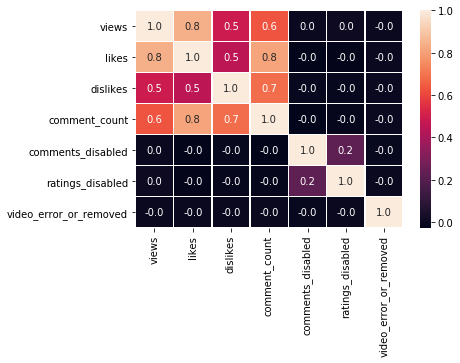

In [13]:
# Visualization has been used to better demonstrate the results:
#heatmap(value, If annot is True, write the data value in each cell)
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

In [14]:
# Creat/add new column and allocate values:
# Use get_loc to get location of country:
df['country'] ='' 
df.iloc[:40881, df.columns.get_loc('country')] = 'canada'
df.iloc[40881:, df.columns.get_loc('country')] = 'usa'
#df.loc[:40881,'country']='canada'
#df.loc[40881:,'country']='usa'

In [15]:
# Look at values in selected rows:
df.iloc[40880:40883]

,c,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country
40880,ca,POTgw38-m58,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,https://i.ytimg.com/vi/POTgw38-m58/default.jpg,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...,Entertainment,canada
0,us,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,usa
1,us,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,usa


In [16]:
# Look at values in selected rows:
df.country[40870:40890]

40870    canada
40871    canada
40872    canada
40873    canada
40874    canada
40875    canada
40876    canada
40877    canada
40878    canada
40879    canada
40880    canada
0           usa
1           usa
2           usa
3           usa
4           usa
5           usa
6           usa
7           usa
8           usa
Name: country, dtype: object

In [17]:
# Add columns and split publish time to date and time.
# Also, convert to pandas datetime format:
df['publish_time']= pd.to_datetime(df.publish_time) 
df['publish_date']= df['publish_time'].dt.date
df['time_publish']= df['publish_time'].dt.time

In [18]:
# Using this Dictionary to map day of week column to name of the day:
map_week_name = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
# Split publish_date column and add year,month,day and day of week, also hour from time_publish to new column:
df["publish_year"]=df["publish_date"].apply(lambda time:time.year)
df["publish_month"]=df["publish_date"].apply(lambda time:time.month)
df["publish_day"]=df["publish_date"].apply(lambda time:time.day)
df["publish_day_of_week"]=df["publish_time"].apply(lambda time:time.dayofweek)
df["publish_day_of_week"]=df["publish_day_of_week"].map(map_week_name)
df["publish_hour"]=df["time_publish"].apply(lambda time:time.hour)

In [20]:
# Change trending date format, add "20" before the year and swap location of the day and month.
# Also, convert to pandas datetime format:
df['date_temp'] = df.trending_date.apply( lambda x: '20' +str(x.split('.')[0]) +'-' +  str(x.split('.')[2]) +'-' +  str(x.split('.')[1]) ) 
df['trend_date'] = pd.to_datetime(df.date_temp)

In [21]:
# Split trend_date column and add year,month,day and day of week to new column:
df["trending_year"]=df["trend_date"].apply(lambda time:time.year)
df["trending_month"]=df["trend_date"].apply(lambda time:time.month)
df["trending_day"]=df["trend_date"].apply(lambda time:time.day)
df["trending_day_of_week"]=df["trend_date"].apply(lambda time:time.dayofweek)
df["trending_day_of_week"]=df["trending_day_of_week"].map(map_week_name)

In [ ]:
# we can not use aggregation function for one column and show others column. so the bellow script wrong. 
#df.groupby('App').Installs.sum()[['Rating', 'Reviews', 'Price','Size']].sort_values(by="Installs",ascending=False).head(20)

In [22]:
# Look at new columns:
df.head(2)

,c,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,publish_month,publish_day,publish_day_of_week,publish_hour,date_temp,trend_date,trending_year,trending_month,trending_day,trending_day_of_week
0,ca,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,...,11,10,Fri,17,2017-11-14,2017-11-14,2017,11,14,Tue
1,ca,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,...,11,13,Mon,17,2017-11-14,2017-11-14,2017,11,14,Tue


In [23]:
# Using value_counts to count number of videos in each category:
df.category_name.value_counts().sort_values(ascending=False)

Entertainment            23395
Music                    10198
People & Blogs            7313
Comedy                    7226
News & Politics           6644
Howto & Style             6149
Sports                    4959
Film & Animation          4403
Science & Technology      3552
Education                 2646
Gaming                    2160
Pets & Animals            1289
Travel & Events            793
Autos & Vehicles           737
Shows                      181
Nonprofits & Activism      131
Movies                       6
Name: category_name, dtype: int64

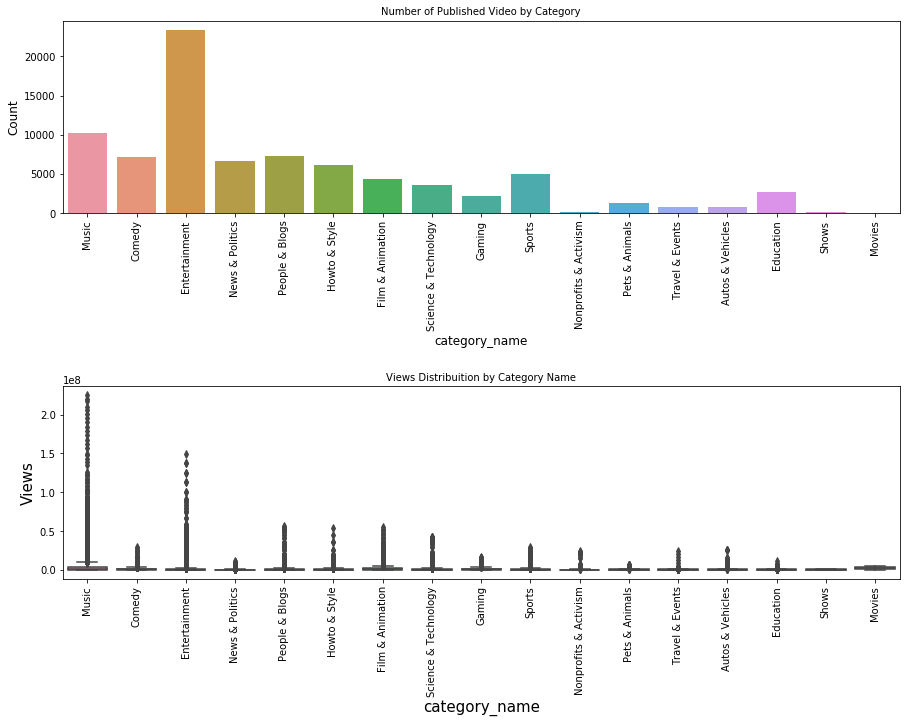

In [24]:
# Using countplot to better visualize video counts of each category:
plt.figure(figsize = (15,10))

plt.subplot(211)
g = sns.countplot('category_name', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Number of Published Video by Category", fontsize=10)
g.set_xlabel("category_name", fontsize=12)
g.set_ylabel("Count", fontsize=12)

# Use box plot to see views distribution by category:
plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views', data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("Views Distribuition by Category Name", fontsize=10)
g1.set_xlabel("category_name", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

"Entertainment" category has published the highest numeber of videos. Also the most viewed video category is Music. 

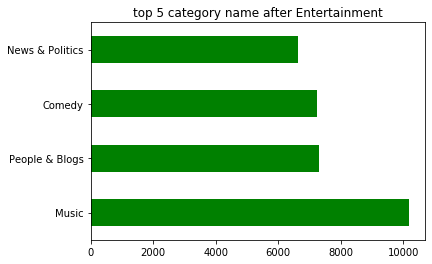

In [25]:
# See top 5 categories with the most number of videos, except Entertainment:
df.category_name.value_counts().sort_values(ascending=False).head(5)[1:6].plot(kind='barh', x='category_name', y='counts', color='green')
plt.title('top 5 category name after Entertainment')
plt.show()

In [26]:
# See which category has the most viewer count by grouping on categort_name:
df.groupby('category_name').views.sum().sort_values(ascending=False)

category_name
Music                    53306136735
Entertainment            34232317391
Film & Animation         10206853276
Comedy                    8819705375
People & Blogs            8138232590
Sports                    7400866060
Howto & Style             5641858481
Science & Technology      4898553174
Gaming                    3369332166
News & Politics           3087700527
Education                 1711949171
Pets & Animals            1000244162
Autos & Vehicles           720756791
Travel & Events            486847561
Nonprofits & Activism      284543015
Shows                      123050566
Movies                      17120490
Name: views, dtype: int64

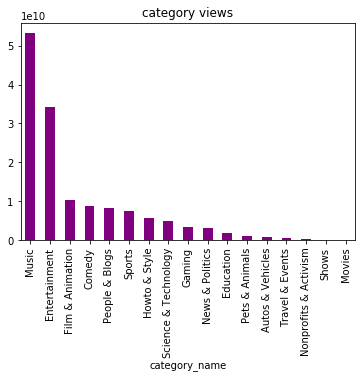

In [27]:
# Using visualization for better understanding:
df.groupby('category_name').views.sum().sort_values(ascending=False).plot(kind='bar', color='purple', title='category views')

"Music" category has the highest number of viewers.

In [28]:
# Compare which country has more viewers in YouTube by grouping country:
df.groupby('country').views.sum().sort_values(ascending=False)


country
usa       96554092462
canada    46891975069
Name: views, dtype: int64

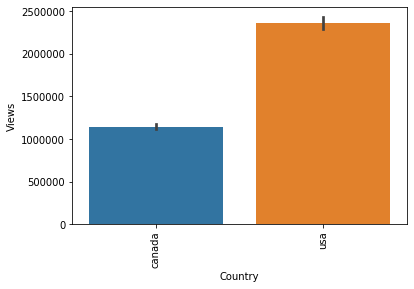

In [29]:
# Using seaborn barplot for better demonstration of the results:
#each subplot equal with one ax and fig mean size of whole all graph:
fig, ax = plt.subplots()
sns.barplot(x="country", y="views", data=df)
sns.barplot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot = ax.set(xlabel="Country", ylabel="Views")

As expected US has more viewers.

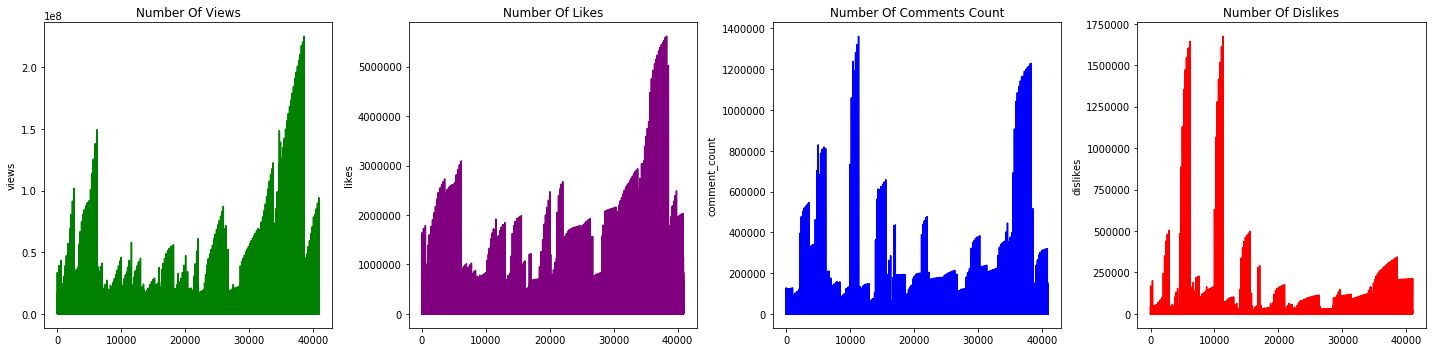

In [30]:
# Using subplot to demonstrate corelation of views, comment_count, likes and dislikes:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.plot(df['views'], color='green')
plt.ylabel('views')
plt.title('Number Of Views')

plt.subplot(1, 4, 2)
plt.plot(df['likes'], color='purple')
plt.ylabel('likes')
plt.title('Number Of Likes')

plt.subplot(1, 4, 3)
plt.plot(df['comment_count'], color='blue')
plt.ylabel('comment_count')
plt.title('Number Of Comments Count')

plt.subplot(1, 4, 4)
plt.plot(df['dislikes'], color='red')
plt.ylabel('dislikes')
plt.title('Number Of Dislikes')

plt.tight_layout()
plt.show()

As generally expected number of views and likes follow a similar pattern and number of dislikes moves in an opposite direction.

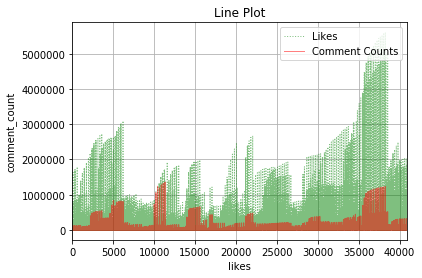

In [31]:
# Using line plot to compare number of comments and likes:
df.likes.plot(kind = 'line', color = 'green', label = 'Likes', linewidth=1, alpha = 0.5, grid = True, linestyle = ':')
df.comment_count.plot(kind = 'line', color = 'r', label = 'Comment Counts', linewidth=1, alpha = 0.5, grid = True, linestyle = '-')
plt.legend(loc='upper right')     
plt.xlabel('likes')              
plt.ylabel('comment_count')
plt.title('Line Plot')            
plt.show()

As expected number of likes are more than number of comments.

Text(0.5, 1.0, 'Dislikes and Comment Counts Scatter Plot')

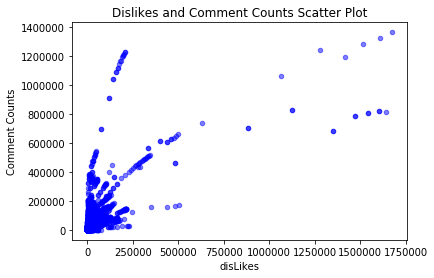

In [32]:
# Using Scatter Plot to compare numer of comment and dislikes:
df.plot(kind='scatter', x='dislikes', y='comment_count',alpha = 0.5,color = 'blue')
plt.xlabel('disLikes')              
plt.ylabel('Comment Counts')
plt.title('Dislikes and Comment Counts Scatter Plot')            

Most of them clustered on left bottom.

In [33]:
# See inside index of country
df.country.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            40939, 40940, 40941, 40942, 40943, 40944, 40945, 40946, 40947,
            40948],
           dtype='int64', length=81782)

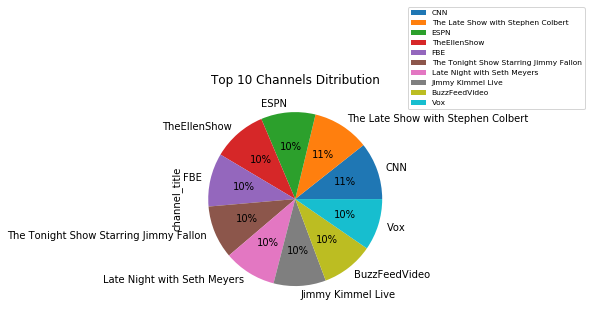

In [34]:
# Using pie plot to see the top 10 channel_title with the most number of videos:
# Use the legend's bbox_to_anchor argument to position the legend outside of the pie. 
# Here we use the axes coordinates (1, 0, 0.5, 1) together with the location "center left";
# i.e. the left central point of the legend will be at the left central point of the bounding box,
# spanning from (1,0) to (1.5,1) in axes coordinates.
#You can set an individual font size for the legend by adjusting the prop keyword.
# Because aggregate act like unique and use index for show top 10
df.channel_title.value_counts().sort_values(ascending=False).head(10).plot(kind='pie', title='Top 10 Channels Ditribution',autopct='%1.0f%%')
labels = df.channel_title.value_counts().sort_values(ascending=False).head(10).index
plt.legend(labels= labels, loc="upper left", prop={'size': 7.5}, bbox_to_anchor=(1,1.40))
plt.show()

'CNN' and 'The Late Show with Stephen Colbert' channel title have the highest number of videos.

In [35]:
# Compare total number of likes between countries:
df.groupby('country').likes.sum()

country
canada    1618179878
usa       3037788204
Name: likes, dtype: int64

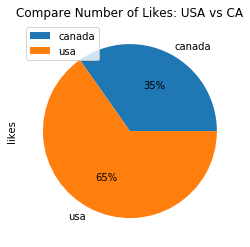

In [36]:
# Compare total number of likes per countru:
# Use unique to show name of country and index is number from 0 to 40948:
df.groupby('country').likes.sum().plot(kind='pie', title='Compare Number of Likes: USA vs CA', autopct='%1.0f%%')
labels = df.country.unique() 
plt.legend(labels= labels, loc="upper left") 
plt.show()

Number of US likes is higher than Canada.

In [37]:
# Using groupby country and cetegory_name to see the top 20 country and category with highest number of viewers:
df.groupby(['country', 'category_name']).views.sum().sort_values(ascending=False).head(20)

country  category_name       
usa      Music                   40126286541
         Entertainment           20561101882
canada   Entertainment           13671215509
         Music                   13179850194
usa      Film & Animation         7267792432
         Comedy                   5111266590
         People & Blogs           4910004664
         Sports                   4403213872
         Howto & Style            4071011870
canada   Comedy                   3708438785
usa      Science & Technology     3473462753
canada   People & Blogs           3228227926
         Sports                   2997652188
         Film & Animation         2939060844
usa      Gaming                   2127799781
canada   News & Politics          1614610043
         Howto & Style            1570846611
usa      News & Politics          1473090484
canada   Science & Technology     1425090421
         Gaming                   1241532385
Name: views, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

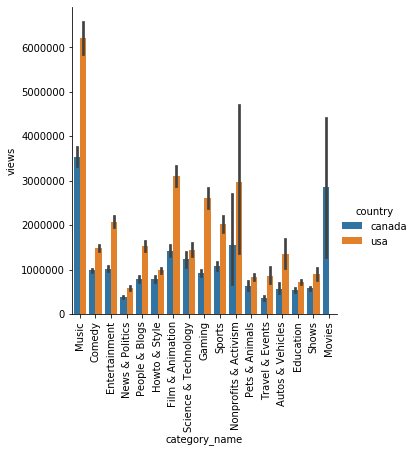

In [38]:
# Using seaborn barplot for better visualization:
barplot= sns.catplot(x="category_name",y="views",hue="country", data=df, kind="bar")
plt.xticks(rotation=90)


Country of USA has much more viewers in each category compared to Canada. Also Music has more viewer than others in both counties. 

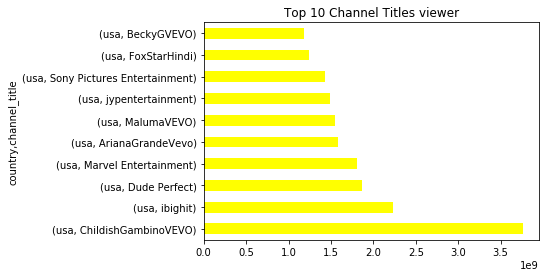

In [39]:
# Using barh plot to see top 10 channel viewes by country:
df.groupby(['country', 'channel_title']).views.sum().sort_values(ascending=False).head(10).plot(kind='barh', color= 'yellow',title='Top 10 Channel Titles viewer')
plt.show()

"ChildishGambinoVEVO" from United States has the highest number of viewers.Also, all top 10 highest channel belong to the US.

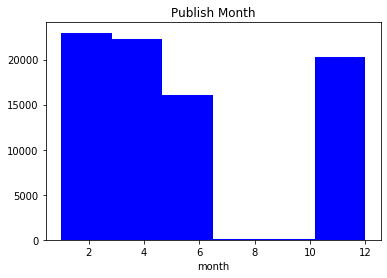

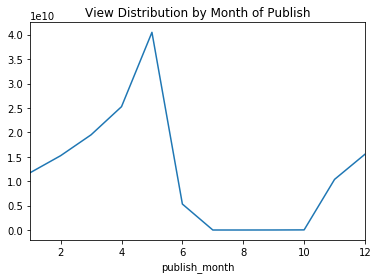

In [40]:
# Using histogeram to see peak month of publish and also using line to see view distribution by month:
x=df.publish_month
plt.hist(x, bins=6, color='blue')
plt.title('Publish Month')
plt.xlabel('month')
plt.show()
df.groupby('publish_month').views.sum().plot(kind= 'line', title='View Distribution by Month of Publish')
plt.show()

1Q, 2Q and 4Q have more publishes, also "May" has the most views.

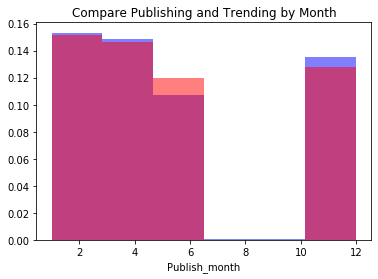

In [41]:
# Using histogeram to compare publish and trending month:
x=df.publish_month
y=df.trending_month
plt.hist(x, density=True, color='blue', bins=6, alpha=.5) 
plt.hist(y, density=True, color='red', bins=6, alpha=.5)
plt.title('Compare Publishing and Trending by Month')
plt.xlabel('Publish_month')
plt.show()


1Q, 2Q and 4Q publish and trending are both higher. 

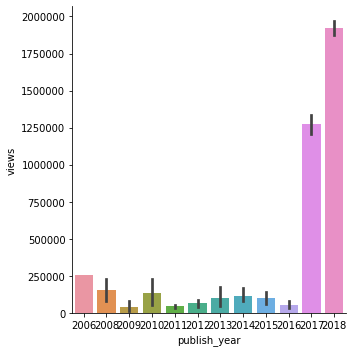

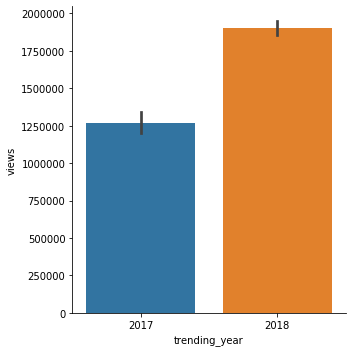

In [42]:
# Using seaborn barplot to show views of publish and trending by year:
sns.catplot(x="publish_year",y="views", data=df, kind="bar")
sns.catplot(x="trending_year",y="views", data=df, kind="bar")

Both trending and publishing are higher in the year 2018.

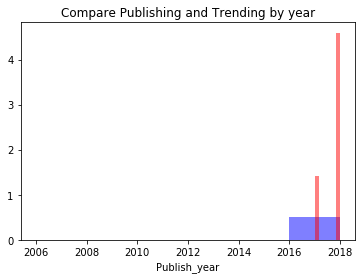

In [43]:
# Using histogeram to compare publish and tending month:
x=df.publish_year
y=df.trending_year
plt.hist(x, density=True, color='blue', bins=6, alpha=.5) 
plt.hist(y, density=True, color='red', bins=6, alpha=.5)
plt.title('Compare Publishing and Trending by year')
plt.xlabel('Publish_year')
plt.show()

2018 publish and trending are higher than 2017, also trending in 2018 is higher than puglish. 

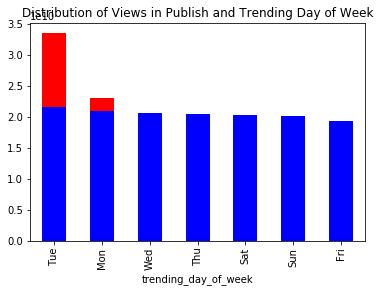

In [44]:
# Groupby publish and trending day of week to see distribution of views by bar plot:
df.groupby('publish_day_of_week').views.sum().sort_values(ascending=False).plot(kind='bar', color='red', title='Distribution of Views in Publish and Trending Day of Week')
df.groupby('trending_day_of_week').views.sum().sort_values(ascending=False).plot(kind='bar', color='blue',title='Distribution of Views in Publish and Trending Day of Week')

Tuesday has higher number of viewer in publish and trending.

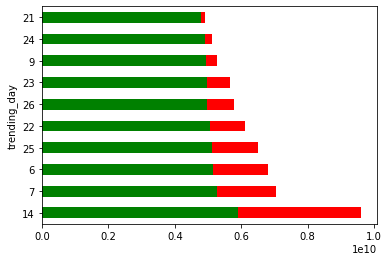

In [45]:
# Groupby publish and trending day to see distribution of views by barh plot:  
df.groupby('publish_day').views.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='red')
df.groupby('trending_day').views.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='green')

Middle of month has higher number of viewer in publish and trending.

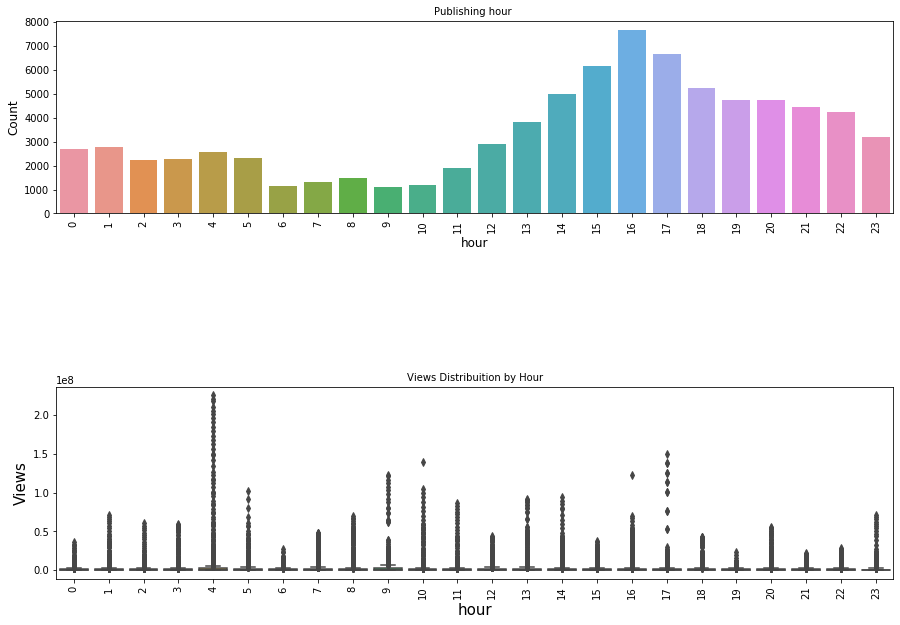

In [46]:
# Using countplot to more visualization to know peek publish hour:
plt.figure(figsize = (15,10))

plt.subplot(211)
g = sns.countplot('publish_hour', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Publishing hour ", fontsize=10)
g.set_xlabel("hour", fontsize=12)
g.set_ylabel("Count", fontsize=12)

#using box plot to see peek publish hour for view 
plt.subplot(212)
g1 = sns.boxplot(x='publish_hour', y='views', data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("Views Distribuition by Hour", fontsize=10)
g1.set_xlabel("hour", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Peak time for publish is 17:00 (5 pm).

In [47]:
# Using T_test to determine if there is a significant difference between the means of views of publish month in canada and us:
# Use reset_index because i want to change panda series to df nead to be old index:
c= df[df.country=='canada'].groupby('trending_month').views.sum().reset_index()['views'] 
c=np.array(c)
u= df[df.country=='usa'].groupby('trending_month').views.sum().reset_index()['views'] 
u=np.array(u)
scipy.stats.ttest_ind(u, c, equal_var=False)

Ttest_indResult(statistic=2.205099781671364, pvalue=0.0602270001826522)

Pvalue is greater than 0.05 means the difference is not significant between canada monthly view and usa.

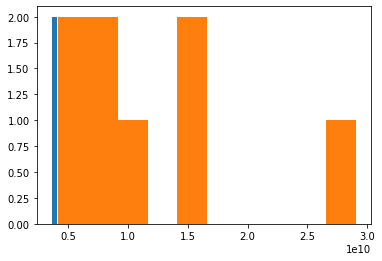

In [48]:
# I would first do hist for both, look at the dist, since t test is a parametric test, it requires normality. 
plt.hist(c) 
plt.hist(u)
plt.show()

Shows both of them are not normal.

In [49]:
# So try mannwhitneyu, which is non parametric test, doesn't require normality  
mannwhitneyu(c, u) 

MannwhitneyuResult(statistic=10.0, pvalue=0.011974337439879718)

Pvalue is less than 0.05 means the difference is  significant between canada monthly view and usa.

Conclusion: 
YouTube view dataset for the United States and Canada were examined using Python and below resutls can be drawn from the conducted analyses: 
1. Entertainment category has published the highest numeber of videos with the most viewed video category being Music in both countries. 
2. As expected US has more viewers and likes. 
3. "CNN" and "The Late Show with Stephen Colbert" channel titles have the highest number of videos.
4. "ChildishGambinoVEVO" from the United States has the highest number of viewers. 
5. All top 10 highest channels belong to the US.
6. 1Q, 2Q and 4Q have more publishes and trending, also month of May has the most views. 
7. Both trending and publishing are higher in the year 2018.
8. There are more viewers in the Middle days of the month with.
9. Peak times for publish is around 17:00 (5:00 pm). 


Future Works: 
    
More countries can be added to the analysis to broaden conclusions. Also newers data can be helpful in drawing conclusions
on some factors such as peak view times and days,  etc.

Quality of the data set could have been improved as well. 

Analysis of the comments can be enriched if they were rated. 
